# 1.1: CALCULATE RATE OF RETURN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb


# Calculate rate of returns for a single stock


# Simple rate of return
# Preferrable for multiple assets in a same time frame

# (P1-P0)/P0 = P1/P0 - 1

In [14]:
# Load the data from yahoo finance.
# Take start date as 2010

AMZN=wb.DataReader('AMZN', data_source='yahoo',start='2010-1-1') 


In [11]:
AMZN.head(5)


High             2.685667e+06
Low              2.625731e+06
Open             2.657572e+06
Close            2.656628e+06
Volume           1.295940e+10
Adj Close        2.656628e+06
Simple Return    3.763335e+00
dtype: float64


In [17]:
#Check loaded data.
AMZN.info()
print(AMZN.tail(5))
print(AMZN.head(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2855 entries, 2010-01-04 to 2021-05-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2855 non-null   float64
 1   Low        2855 non-null   float64
 2   Open       2855 non-null   float64
 3   Close      2855 non-null   float64
 4   Volume     2855 non-null   int64  
 5   Adj Close  2855 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 156.1 KB
                   High          Low         Open        Close   Volume  \
Date                                                                      
2021-04-30  3554.000000  3462.500000  3525.120117  3467.419922  7001800   
2021-05-03  3486.649902  3372.699951  3484.729980  3386.489990  5875500   
2021-05-04  3367.979980  3272.129883  3356.189941  3311.870117  5439400   
2021-05-05  3354.699951  3264.360107  3338.860107  3270.540039  3701700   
2021-05-06  3314.399902  3247.199951  3270.000000  330

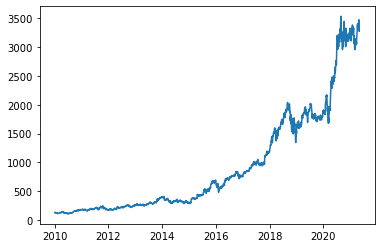

In [30]:
plt.plot(AMZN["Adj Close"])

In [31]:
#AMZN[AMZN.Date == "2010-01-04"]
print(AMZN.iloc[0,:])
print(AMZN.iloc[-1,:])
print(AMZN.iloc[-1,5]/AMZN.iloc[0,5]-1)


High         1.366100e+02
Low          1.331400e+02
Open         1.362500e+02
Close        1.339000e+02
Volume       7.599900e+06
Adj Close    1.339000e+02
Name: 2010-01-04 00:00:00, dtype: float64
High         3.314400e+03
Low          3.247200e+03
Open         3.270000e+03
Close        3.306370e+03
Volume       4.164960e+06
Adj Close    3.306370e+03
Name: 2021-05-06 00:00:00, dtype: float64
23.692832471251595


In [9]:
# Use the adjusted price as the market convention to calculate the return
AMZN['Simple Return']=(AMZN['Adj Close']/AMZN['Adj Close'].shift(1))-1


# Check new column data of simple return
print(AMZN['Simple Return'].head(5))

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Simple Return, dtype: float64


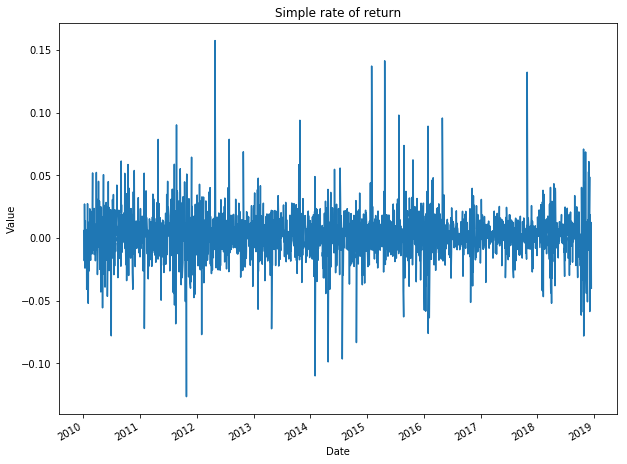

In [5]:
# Plot the simple return, this is just the daily rate, not too much meaningful
AMZN['Simple Return'].plot(figsize=(10,8))
plt.title('Simple rate of return')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [6]:
# Obtain the average daily simple return over 2010-2018
avg_return_d=AMZN['Simple Return'].mean()
print(avg_return_d)

0.00129543950239


In [7]:
# Obtain the average annual simple return 
# Multiple by 250 trading days over a year
avg_return_a=AMZN['Simple Return'].mean()*250
avg_return_a

0.3238598755964203

In [8]:
print(str(round(avg_return_a,5)*100), "%")

('32.386', '%')



# LOG RETURN

# Preferrable for 1 asset over time periods



In [9]:
AMZN['Log Return']=np.log(AMZN['Adj Close']/AMZN['Adj Close'].shift(1))

In [10]:
AMZN.tail(5)

,High,Low,Open,Close,Volume,Adj Close,Simple Return,Log Return
Date,,,,,,,,
2018-12-10,1657.989990,1590.869995,1623.839966,1641.030029,7494800,1641.030029,0.007305,0.007278
2018-12-11,1679.469971,1619.599976,1678.000000,1643.239990,6244700,1643.239990,0.001347,0.001346
2018-12-12,1704.989990,1660.270020,1669.000000,1663.540039,6598000,1663.540039,0.012354,0.012278
2018-12-13,1692.119995,1641.500000,1680.000000,1658.380005,5271300,1658.380005,-0.003102,-0.003107
2018-12-14,1642.569946,1585.000000,1638.000000,1591.910034,6351400,1591.910034,-0.040081,-0.040907


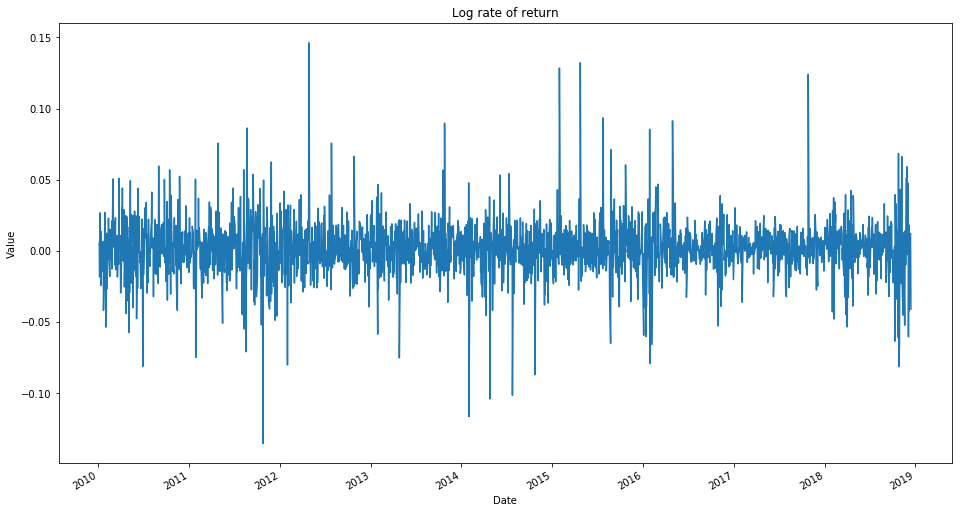

In [11]:
AMZN['Log Return'].plot(figsize=(16,9))
plt.title('Log rate of return')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

In [12]:
log_return_avg=AMZN['Log Return'].mean()
log_return_avg

0.0010988001094093946

In [13]:
log_return_Annual_Avg=log_return_avg *250
log_return_Annual_Avg

0.27470002735234866

In [14]:
print(str(round(log_return_Annual_Avg,5)*100),' %')

('27.47', ' %')


# 1.1.1 CALCULATE RETURN OF INDICES


In [15]:
Indices=['S&P500','NASDAD','DAX30','NEKKEI','CAC40','SHANGHAI']
tickers_indices=['^GSPC', '^IXIC', '^GDAXI', '^N225', '^FCHI', '^SSEC']
ind_data=pd.DataFrame()
for t in tickers_indices:
    ind_data[t]=wb.DataReader(t,data_source='yahoo', start='2010-01-01')['Adj Close']

In [16]:
ind_data.tail(5)

,^GSPC,^IXIC,^GDAXI,^N225,^FCHI,^SSEC
Date,,,,,,
2018-12-10,2637.719971,7020.520020,10622.070312,21219.500000,4742.379883,NaN
2018-12-11,2636.780029,7031.830078,10780.509766,21148.019531,4806.200195,NaN
2018-12-12,2651.070068,7098.310059,10929.429688,21602.750000,4909.450195,NaN
2018-12-13,2650.540039,7070.330078,10924.700195,21816.189453,4896.919922,NaN
2018-12-14,2599.949951,6910.669922,10865.769531,21374.830078,4853.700195,NaN


In [17]:
ind_data.iloc[0]

^GSPC      1132.989990
^IXIC      2308.419922
^GDAXI     6048.299805
^N225     10654.790039
^FCHI      4013.969971
^SSEC      3243.760010
Name: 2010-01-04 00:00:00, dtype: float64

<function matplotlib.pyplot.show>

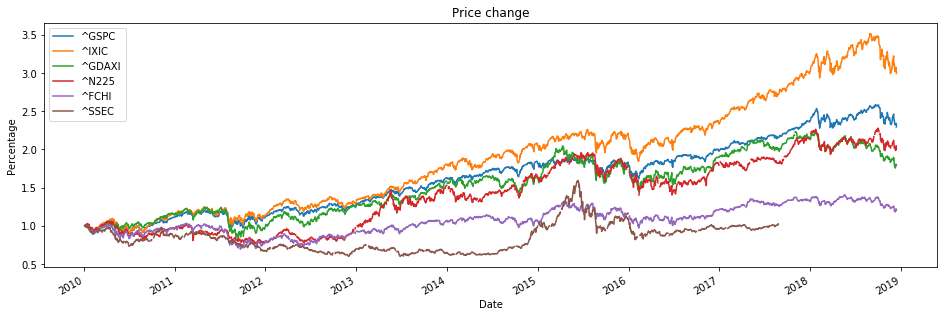

In [18]:
(ind_data/ind_data.iloc[0]).plot(figsize=(16,5))
plt.title('Price change')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.show

In [19]:
returns_indi=(ind_data/ind_data.shift(1))-1
returns_indi.tail(5)

,^GSPC,^IXIC,^GDAXI,^N225,^FCHI,^SSEC
Date,,,,,,
2018-12-10,0.001762,0.007357,-0.015389,-0.021181,-0.014699,NaN
2018-12-11,-0.000356,0.001611,0.014916,-0.003369,0.013457,NaN
2018-12-12,0.005420,0.009454,0.013814,0.021502,0.021483,NaN
2018-12-13,-0.000200,-0.003942,-0.000433,0.009880,-0.002552,NaN
2018-12-14,-0.019087,-0.022582,-0.005394,-0.020231,-0.008826,NaN


In [20]:
markets_returns=returns_indi.mean()*250
markets_returns

^GSPC     0.103157
^IXIC     0.136123
^GDAXI    0.086740
^N225     0.101776
^FCHI     0.034548
^SSEC    -0.001199
dtype: float64

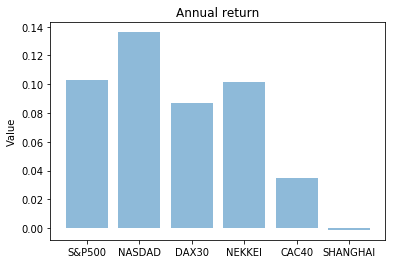

In [21]:
plt.bar(Indices,list(markets_returns),align='center',alpha=0.5)
plt.ylabel('Value')
plt.title('Annual return')
plt.show()

# Compare the rate of returns and growths for a list of stocks and their market.
# Select the good performance stocks to invest in

In [22]:
tickers_2=['AMZN','^GSPC','MSFT','BAC','JPM', 'PG','HPE']
data_2=pd.DataFrame()
for t in tickers_2:
    data_2[t]=wb.DataReader(t,data_source='yahoo',start='2010-01-01')['Adj Close']

In [23]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2254 entries, 2010-01-04 to 2018-12-14
Data columns (total 7 columns):
AMZN     2254 non-null float64
^GSPC    2254 non-null float64
MSFT     2254 non-null float64
BAC      2254 non-null float64
JPM      2254 non-null float64
PG       2254 non-null float64
HPE      796 non-null float64
dtypes: float64(7)
memory usage: 140.9 KB


In [24]:
data_2.head(5)

,AMZN,^GSPC,MSFT,BAC,JPM,PG,HPE
Date,,,,,,,
2010-01-04,133.899994,1132.989990,24.720928,14.420351,34.542870,45.870895,NaN
2010-01-05,134.690002,1136.520020,24.728914,14.889081,35.211952,45.885899,NaN
2010-01-06,132.250000,1137.140015,24.577150,15.063710,35.405426,45.668251,NaN
2010-01-07,130.000000,1141.689941,24.321552,15.560015,36.106758,45.420593,NaN
2010-01-08,133.520004,1144.979980,24.489288,15.422150,36.018101,45.360538,NaN


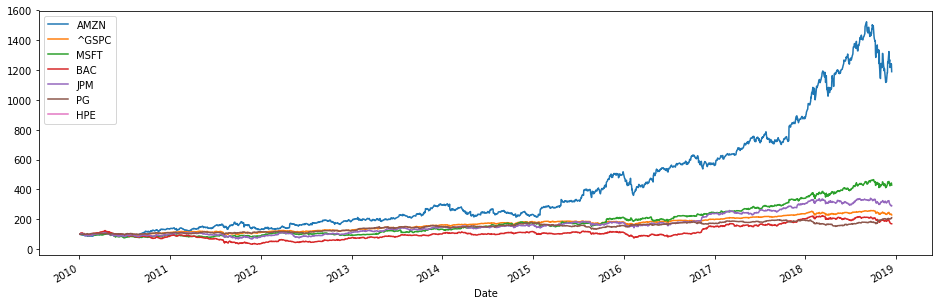

In [25]:
(data_2/data_2.iloc[0]*100).plot(figsize=(16,5));
plt.show()

# 1.1.2: RATE OF RETURN FOR A PORTFOLIO


In [26]:
tickers=['AMZN','MSFT','BAC','JPM','PG']
mydata=pd.DataFrame()
for t in tickers:
    mydata[t]=wb.DataReader(t,data_source='yahoo',start='2010-01-01')['Adj Close']

In [27]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2254 entries, 2010-01-04 to 2018-12-14
Data columns (total 5 columns):
AMZN    2254 non-null float64
MSFT    2254 non-null float64
BAC     2254 non-null float64
JPM     2254 non-null float64
PG      2254 non-null float64
dtypes: float64(5)
memory usage: 105.7 KB


In [28]:
mydata.head(5)

,AMZN,MSFT,BAC,JPM,PG
Date,,,,,
2010-01-04,133.899994,24.720928,14.420351,34.542870,45.870895
2010-01-05,134.690002,24.728914,14.889081,35.211952,45.885899
2010-01-06,132.250000,24.577150,15.063710,35.405426,45.668251
2010-01-07,130.000000,24.321552,15.560015,36.106758,45.420593
2010-01-08,133.520004,24.489288,15.422150,36.018101,45.360538


In [29]:
mydata.tail(5)

,AMZN,MSFT,BAC,JPM,PG
Date,,,,,
2018-12-10,1641.030029,107.589996,24.76,101.360001,93.029999
2018-12-11,1643.239990,108.589996,24.58,100.370003,93.910004
2018-12-12,1663.540039,109.080002,24.52,101.019997,94.029999
2018-12-13,1658.380005,109.449997,24.40,101.120003,96.489998
2018-12-14,1591.910034,106.029999,24.48,100.290001,96.639999


# NORMALISATION TO 100
# Put all assets into same starting point as 100%, easier to compare the performance of each asset over its 1st point.
# Pt/P0 *100

In [30]:
# Take the data of the 1st row, using iloc, just indicate the position in the array

mydata.iloc[0]

AMZN    133.899994
MSFT     24.720928
BAC      14.420351
JPM      34.542870
PG       45.870895
Name: 2010-01-04 00:00:00, dtype: float64

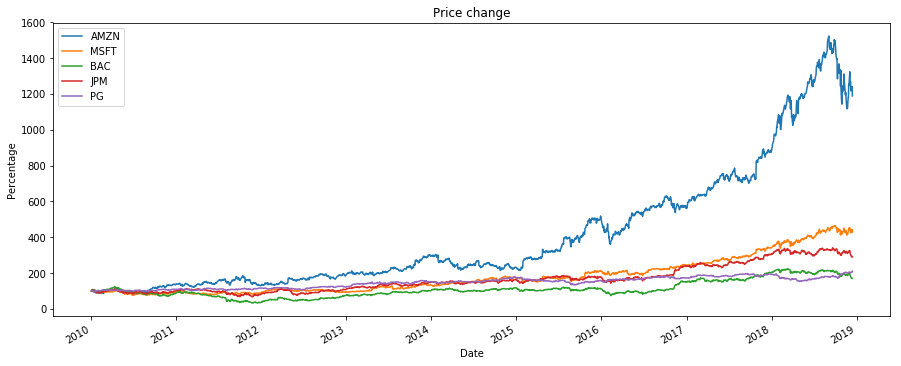

In [31]:
# Plot the price's changes in percentage to compare the evolution between stocks

(mydata/mydata.iloc[0]*100).plot(figsize=(15,6))
plt.title('Price change')
plt.xlabel('Date')
plt.ylabel('Percentage')

plt.show()

In [32]:
# using loc['lable'], can choose specific date

mydata.loc['2018-12-07']

AMZN    1629.130005
MSFT     104.820000
BAC       25.430000
JPM      103.290001
PG        92.449997
Name: 2018-12-07 00:00:00, dtype: float64

# PORTFOLIO ANNUAL RETURN

In [33]:
# CALCULATE DAILY RETURN FOR EACH ASSET:
# CREATE A NEW DATA FOR DAILY RETURN:

returns=(mydata/mydata.shift(1))-1
returns.tail(5)

,AMZN,MSFT,BAC,JPM,PG
Date,,,,,
2018-12-10,0.007305,0.026426,-0.026347,-0.018685,0.006274
2018-12-11,0.001347,0.009295,-0.007270,-0.009767,0.009459
2018-12-12,0.012354,0.004512,-0.002441,0.006476,0.001278
2018-12-13,-0.003102,0.003392,-0.004894,0.000990,0.026162
2018-12-14,-0.040081,-0.031247,0.003279,-0.008208,0.001555


In [34]:
# Make the allocation for each stock, here, 
# We try to put the same weights in order to compare easily the performance of stocks within the portfolio

weights1=np.array([0.2,0.2,0.2,0.2,0.2])

In [35]:
# Be careful, if keep the daily return, when multiply with weight, we get the porfolio return but it is the daily one.
# so calculate the average return for each asset first!, to be more convenient, calculate the annual one

annual_return=returns.mean()*250
annual_return

AMZN    0.323860
MSFT    0.187483
BAC     0.114126
JPM     0.150937
PG      0.093035
dtype: float64

In [36]:
# Calculate the portfolio annual return:

pfolio1=np.dot(annual_return,weights1)
pfolio1

0.17388844918133406

In [37]:
print(str(round(pfolio1*100,2)),' %')

('17.39', ' %')


In [38]:
annual_return_for_plot=list(annual_return)
annual_return_for_plot.insert(0,pfolio1)
annual_return_for_plot

[0.17388844918133406,
 0.3238598755964203,
 0.18748327964195566,
 0.11412647187993959,
 0.1509373866105739,
 0.09303523217778076]

In [39]:
tickers=['AMZN','MSFT','BAC','JPM','PG']
tickers.insert(0,'Portfolio')
tickers

['Portfolio', 'AMZN', 'MSFT', 'BAC', 'JPM', 'PG']

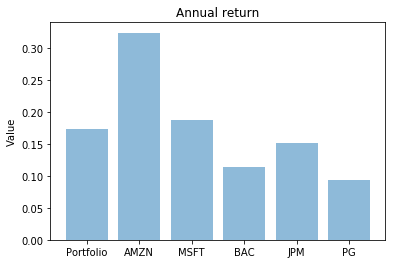

In [40]:
# Plot the returns of each stock and over portfolio

plt.bar(tickers,annual_return_for_plot,align='center',alpha=0.5)
plt.ylabel('Value')
plt.title('Annual return')
plt.show()


# 1.2: RISK MEASUREMENT

In [41]:
returns.mean()*250

AMZN    0.323860
MSFT    0.187483
BAC     0.114126
JPM     0.150937
PG      0.093035
dtype: float64

In [42]:
returns.std()*250**0.5

AMZN    0.313883
MSFT    0.227528
BAC     0.332255
JPM     0.255484
PG      0.143910
dtype: float64

In [43]:
returns.cov()*250

,AMZN,MSFT,BAC,JPM,PG
AMZN,0.098523,0.033215,0.033759,0.027071,0.008306
MSFT,0.033215,0.051769,0.031867,0.027351,0.011399
BAC,0.033759,0.031867,0.110394,0.070161,0.013178
JPM,0.027071,0.027351,0.070161,0.065272,0.012903
PG,0.008306,0.011399,0.013178,0.012903,0.020710


In [44]:
returns.corr()

,AMZN,MSFT,BAC,JPM,PG
AMZN,1.000000,0.465090,0.323703,0.337578,0.183877
MSFT,0.465090,1.000000,0.421533,0.470524,0.348129
BAC,0.323703,0.421533,1.000000,0.826527,0.275595
JPM,0.337578,0.470524,0.826527,1.000000,0.350946
PG,0.183877,0.348129,0.275595,0.350946,1.000000


In [45]:
# CALCULATE PORFOLIO RISK

Portfolio Variance

In [46]:
weights1=np.array([0.2,0.2,0.2,0.2,0.2])
Pfolio_var=np.dot(weights1.T,np.dot(returns.cov()*250,weights1))
Pfolio_var

0.0354034674132402

Portfolio Volatility

In [47]:
# Vol of a potfolio is exactly the std of it.
Pfolio_vol=Pfolio_var**0.5
print(str(round(Pfolio_vol,5)*100), '%')


('18.816', '%')


# Porfolio risk = systematic/un-diversifiable + unsystematic/diversifiable

In [48]:
# Unsystematic risk:
weighted=weights1*weights1
weighted

array([0.04, 0.04, 0.04, 0.04, 0.04])

In [49]:
Diver_risk=np.dot(weighted,returns[['AMZN','MSFT','BAC','JPM','PG']].var()*250)
Diver_risk

0.013866698308671255

In [50]:
Systematic_risk=Pfolio_var-Diver_risk
Systematic_risk

0.021536769104568945

# PART 2: Markowitz Portfolio Optimization and CAPM Model

In [51]:
# empty lists to store returns, volatility and weights of imiginary portfolios
pf_return = []
pf_volatility = []
sharpe_ratio = []

In [52]:
del tickers[0]
tickers

['AMZN', 'MSFT', 'BAC', 'JPM', 'PG']

In [53]:
#simulate 50,000 case of random weights of 5-asset portfolio. For each case, calculate the portfolio return, volatility and sharpe ratio
for t in range(50000):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    pf_return.append(np.sum(weights*annual_return))
    pf_volatility.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov()*250,weights))))
    sharpe_ratio.append(np.sum(weights*annual_return)/np.sqrt(np.dot(weights.T,np.dot(returns.cov()*250,weights))))

In [54]:
pf_data = pd.DataFrame({'Return':pf_return,'Volatility':pf_volatility,'Sharpe Ratio': sharpe_ratio})

In [55]:
column_order = ['Return', 'Volatility', 'Sharpe Ratio']
pf_data = pf_data[column_order]

In [56]:
pf_data.head(10)

,Return,Volatility,Sharpe Ratio
0,0.160831,0.190240,0.845409
1,0.138244,0.183150,0.754812
2,0.177295,0.192779,0.919678
3,0.183852,0.181978,1.010297
4,0.170181,0.166023,1.025043
5,0.206890,0.187631,1.102642
6,0.151424,0.151754,0.997823
7,0.161067,0.186554,0.863377
8,0.175836,0.185569,0.947549
9,0.161548,0.186178,0.867708


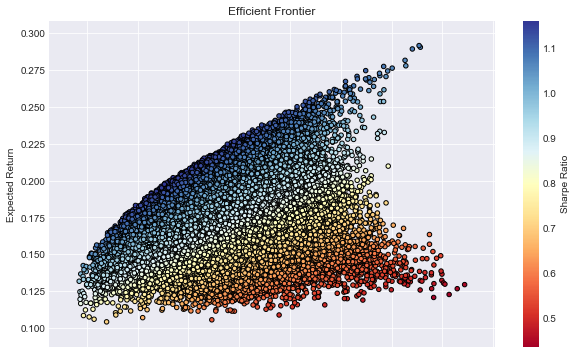

In [57]:
#plot all the figures
plt.style.use('seaborn-dark')
pf_data.plot.scatter(y='Return',x='Volatility',c='Sharpe Ratio',cmap='RdYlBu',figsize=(10,6),edgecolors='black',grid=True)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.show()

locate the optimal portfolio and another portfolio with the minimum volatility for the most risk-averse investor

In [58]:
# find min Volatility & max sharpe values in the dataframe (pf_data)
min_volatility = pf_data['Volatility'].min()
max_sharpe = pf_data['Sharpe Ratio'].max()

In [59]:
# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = pf_data.loc[pf_data['Sharpe Ratio'] == max_sharpe]
min_variance_port = pf_data.loc[pf_data['Volatility'] == min_volatility]


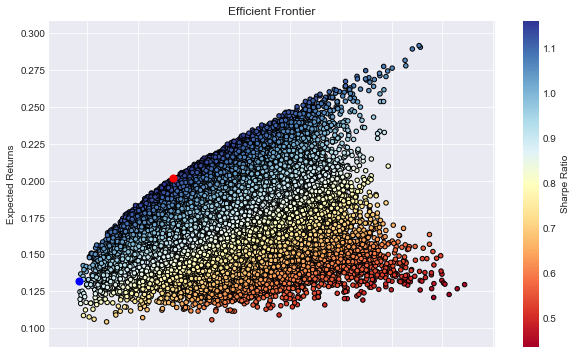

In [60]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
pf_data.plot.scatter(x='Volatility', y='Return', c='Sharpe Ratio',
                cmap='RdYlBu', edgecolors='black', figsize=(10, 6), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Return'], c='red', marker='o', s=50)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Return'], c='blue', marker='o', s=50 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()


In [61]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                  6651
Return        0.131829
Volatility    0.137051
Sharpe Ratio  0.961895
                 34277
Return        0.201965
Volatility    0.174006
Sharpe Ratio  1.160676


In [62]:
#Let access the stock AMZN for CAPM:
portfolio2 = ('AMZN','^GSPC')
data = pd.DataFrame()
for i in portfolio2:
    data[i]=wb.DataReader(i,data_source='yahoo',start = '2010-01-01')['Adj Close']

In [63]:
returns2 = (data/data.shift(1))-1
annual_return2=returns2.mean()*250
cov_matrix= returns2.cov()*250
cov_matrix

,AMZN,^GSPC
AMZN,0.098523,0.025506
^GSPC,0.025506,0.021892


In [64]:
cov_with_market=cov_matrix.iloc[0,1]
market_var=cov_matrix.iloc[1,1]
print 'cov_with_market: ',cov_with_market,  ';  market_var: ', market_var

cov_with_market:  0.02550610771938291 ;  market_var:  0.021891628851319615


** Beta: **
### $$ 
\beta_{amzn} = \frac{\sigma_{amzn,m}}{\sigma_{m}^2}
$$

In [65]:
Beta_AMZN=cov_matrix.iloc[0,1]/cov_matrix.iloc[1,1]
Beta_AMZN

1.1651078086793627

**Calculate the expected return of P&G (CAPM):**
### $$
\overline{r_{amzn}} = r_f + \beta_{amzn}(\overline{r_{m}} - r_f) 
$$

In [66]:
AMZN_ER=0.025+Beta_AMZN*0.05
AMZN_ER

0.08325539043396814

# PART 3: MONTE CARLO SIMULATION APPLICATION

# 3.1: ASSET PRICING

In [67]:
# import more modules from scipy
from scipy.stats import norm
%matplotlib inline

In [68]:
# Using Amazon stock to make pricing, based on its results from part 1
AMZN=wb.DataReader('AMZN', data_source='yahoo',start='2010-1-1')['Adj Close']

In [69]:
# Calculate again log return of AMZN, but use different method, that is percentage change

AMZN_logreturns=np.log(1+AMZN.pct_change())

In [70]:
# Check the consistence with previous method
AMZN_logreturns.tail(5)

Date
2018-12-10    0.007278
2018-12-11    0.001346
2018-12-12    0.012278
2018-12-13   -0.003107
2018-12-14   -0.040907
Name: Adj Close, dtype: float64

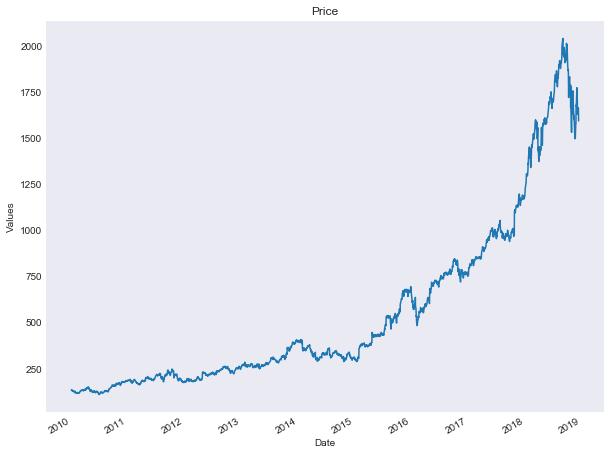

In [71]:
# plot the price of AMZN over 8 years
AMZN.plot(figsize=(10,8))
plt.title('Price')
plt.xlabel('Date')
plt.ylabel('Values')

plt.show()

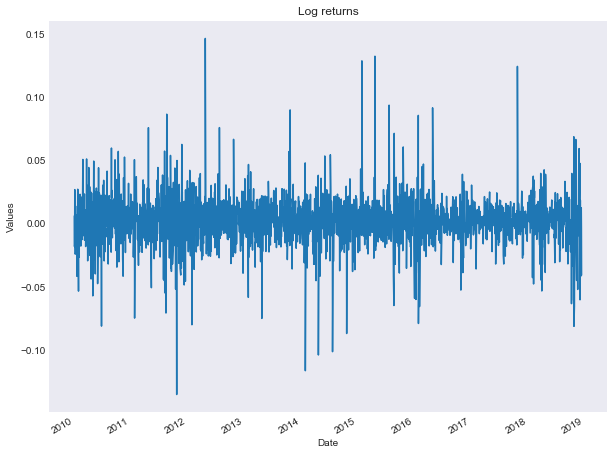

In [72]:
# plot the log returns of AMZN
AMZN_logreturns.plot(figsize=(10,8))
plt.title('Log returns')
plt.xlabel('Date')
plt.ylabel('Values')

plt.show()

In [73]:
# Obtain again the mean and variance of log returns 
# to calculate the Brownian Motion formula

# Daily return = exp(r)
# r = drift + Std*Z
# Drift = Mean - 0.5xVariance

In [74]:
AMZN_logreturns_mean=AMZN_logreturns.mean()
AMZN_logreturns_var=AMZN_logreturns.var()
AMZN_logreturns_std=AMZN_logreturns.std()

In [75]:
drift=AMZN_logreturns_mean-0.5*AMZN_logreturns_var
drift
# It is tiny number, but reasonable since we try to prodict the daily price, not the annual one

0.0009031208202409348

In [76]:
# Convert values into numpy array
drift=np.array([drift])
AMZN_logreturns_std=np.array([AMZN_logreturns_std])
drift

array([0.00090312])

In [77]:
# t_intervals: number of days that the price will be pridicted
# iterations: number of scenerios

t_intervals=250 # 250 trading days in a year
iterations=20   # 10 scenerios


In [78]:
# Generate the random component
# np.randome.rand(10,2) to obtain random numbers in (0,1) in 10x2 matrix form
# norm.ppf to obtain the number of standard deviation from the mean
Z=norm.ppf(np.random.rand(t_intervals,iterations))
Z

array([[-1.32603668,  0.01587147, -1.37437332, ...,  0.6751316 ,
         1.60948452, -1.32932647],
       [-0.64743106, -1.01975144,  0.19253533, ...,  0.21026835,
        -0.10306432,  1.12153655],
       [-0.51002063, -0.05787037, -0.15354532, ...,  0.416302  ,
         0.27691698, -2.0232209 ],
       ...,
       [-1.00284998, -0.66143969, -2.55234735, ...,  0.57427645,
        -0.43224762, -0.36380369],
       [-0.77764975, -0.01862283,  0.01611887, ...,  0.89779298,
         0.11390899, -0.700798  ],
       [-0.50180207, -0.06795857, -1.37722979, ..., -1.02068345,
        -2.50596375,  0.41375706]])

In [79]:
projected_daily_returns=np.exp(drift+AMZN_logreturns_std*Z)
projected_daily_returns

array([[0.97498852, 1.00121784, 0.97405665, ..., 1.01436125, 1.03328516,
        0.97492507],
       [0.98816571, 0.98091408, 1.00472312, ..., 1.00507565, 0.99886487,
        1.02335888],
       [0.99085556, 0.99975831, 0.99786784, ..., 1.00918062, 1.00640171,
        0.96163355],
       ...,
       [0.98124212, 0.9878919 , 0.95162006, ..., 1.01233942, 0.99238123,
        0.99372584],
       [0.98562339, 1.00053485, 1.00122274, ..., 1.01883923, 1.00316155,
        0.98712301],
       [0.99101667, 0.99955881, 0.97400161, ..., 0.980896  , 0.95249367,
        1.00912981]])

# St = So * daily return at time t

In [80]:
# obtain price of latest day as a starting point to make forecastion
So=AMZN.iloc[-1]
So

1591.9100341796875

In [81]:
# create a matrix for projected price
price_list=np.zeros_like(projected_daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
# set the fist row as the So
price_list[0]=So
price_list

array([[1591.91003418, 1591.91003418, 1591.91003418, ..., 1591.91003418,
        1591.91003418, 1591.91003418],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [83]:
# project the price for next day using loop
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]*projected_daily_returns[t]

In [84]:
# obtain the completed projection for price
price_list

array([[1591.91003418, 1591.91003418, 1591.91003418, ..., 1591.91003418,
        1591.91003418, 1591.91003418],
       [1573.07091547, 1561.52697403, 1599.4288238 , ..., 1599.99001571,
        1590.10300344, 1629.09527037],
       [1558.68606209, 1561.14957323, 1596.01859068, ..., 1614.67891518,
        1600.28238783, 1566.59267291],
       ...,
       [1208.42749566, 2553.21993408, 2197.64862779, ..., 1429.49034675,
        1812.03916201, 1979.22044293],
       [1191.0544022 , 2554.58552965, 2200.33578905, ..., 1456.42083952,
        1817.76800552, 1953.7340448 ],
       [1180.35476958, 2553.45846776, 2143.13060635, ..., 1428.59737437,
        1731.41251317, 1971.57127034]])

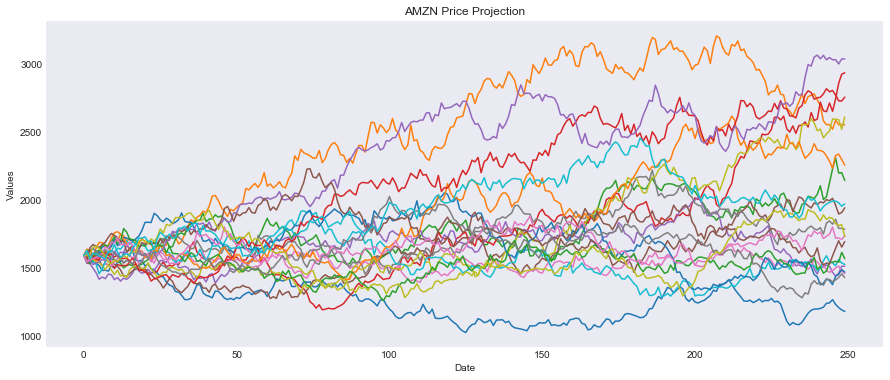

In [85]:
# Plot the price projection
plt.figure(figsize=(15,6))
plt.plot(price_list)
plt.title('AMZN Price Projection')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()